# Digital Marketing: Marketing Analysis (Academic Exercise)

This notebook demonstrates basic **data processing and machine learning practice** using retail sales and store features datasets.  
It is intended as an academic archive for data analysis exercises.

In [ ]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

sns.set(style="whitegrid", palette="Set2")

## 1. Data Loading
We load three datasets: Features, Sales, and Stores.  
(Here, file paths are placeholders — actual data not included in this archive.)


In [ ]:
# Load datasets (replace with actual paths if available)
features = pd.read_csv("data/Features.csv")
sales = pd.read_csv("data/Sales.csv")
stores = pd.read_csv("data/Stores.csv")

# Preview data
features.head()

## 2. Exploratory Data Analysis (EDA)
We explore store types, holiday sales, and time series trends.

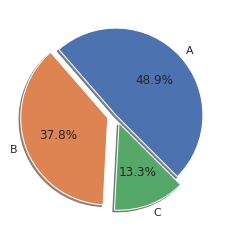

In [ ]:
# Store type distribution
store_counts = stores['Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(store_counts, labels=store_counts.index, autopct='%1.1f%%')
plt.title("Store Type Distribution")
plt.show()

In [ ]:
sales[sales['Store'] == 1]

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
10239,1,99,31/08/2012,20.06,False
10240,1,99,07/09/2012,0.05,True
10241,1,99,14/09/2012,0.03,False
10242,1,99,05/10/2012,635.00,False


In [ ]:
b = sales.groupby('IsHoliday').mean('Weekly_Sales')
b

,Store,Dept,Weekly_Sales
IsHoliday,,,
False,22.202473,44.252633,15901.445069
True,22.175078,44.361856,17035.823187


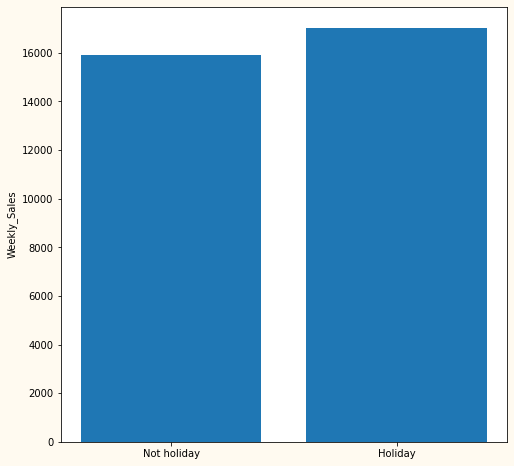

In [ ]:
# Weekly sales comparison: holiday vs non-holiday
holiday_sales = sales.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_sales.plot(kind='bar', color=['#66c2a5','#fc8d62'])
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.ylabel("Sales")
plt.show()

In [ ]:
c = sales[sales['Store']==1].groupby('Date').sum('Weekly_Sales')
c

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
01/04/2011,71,3137,1495064.75,0
01/06/2012,71,3137,1624477.58,0
01/07/2011,69,3035,1488538.09,0
01/10/2010,73,3233,1453329.50,0
02/03/2012,72,3236,1688420.76,0
...,...,...,...,...
30/07/2010,72,3215,1371986.60,0
30/09/2011,72,3182,1394561.83,0
30/12/2011,73,3281,1497462.72,73


In [ ]:
# Helper function for extracting time series by store
def get_row(data, store, col_name):
    """
    Extracts all values of a given column for a specific store,
    along with corresponding dates.
    """
    store_data = data[data['Store'] == store]
    dates_np = store_data["Date"].to_numpy()
    values_np = store_data[col_name].to_numpy()
    return dates_np, values_np

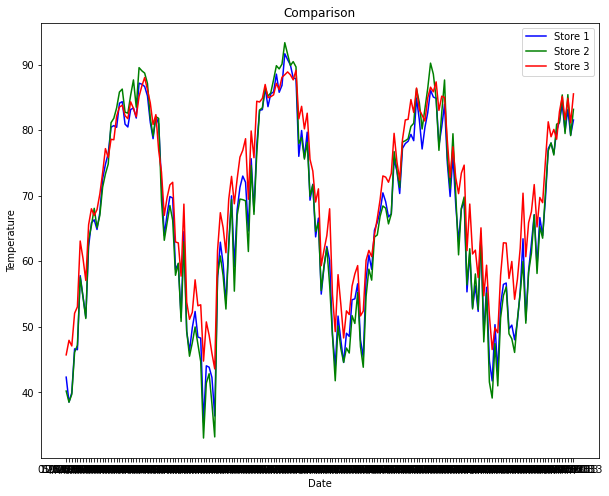

In [ ]:
# Temperature comparison across stores
plt.figure(figsize=(10,8))
for store, color in zip([1,2,3], ["b","g","#FF0000"]):
    dates, temp = get_row(features, store, 'Temperature')
    plt.plot(dates, temp, label=f"Store {store}", color=color)

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Comparison Across Stores")
plt.legend()
plt.show()

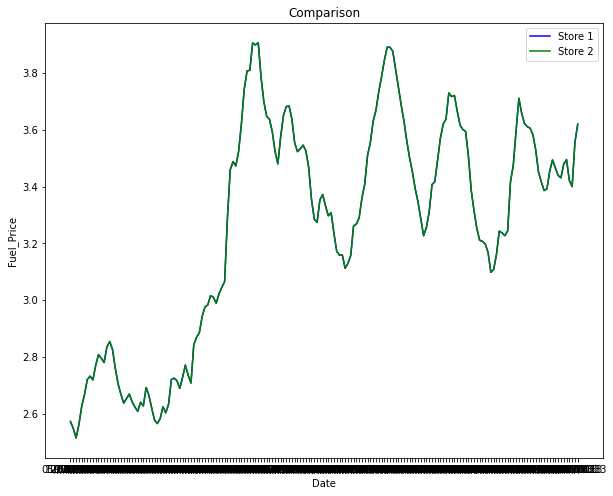

In [ ]:
# Fuel price comparison across stores
plt.figure(figsize=(10,8))
for store, color in zip([1,2,3], ["b","g","#FF0000"]):
    dates, fuel = get_row(features, store, 'Fuel_Price')
    plt.plot(dates, fuel, label=f"Store {store}", color=color)

plt.xlabel("Date")
plt.ylabel("Fuel Price")
plt.title("Fuel Price Comparison Across Stores")
plt.legend()
plt.show()

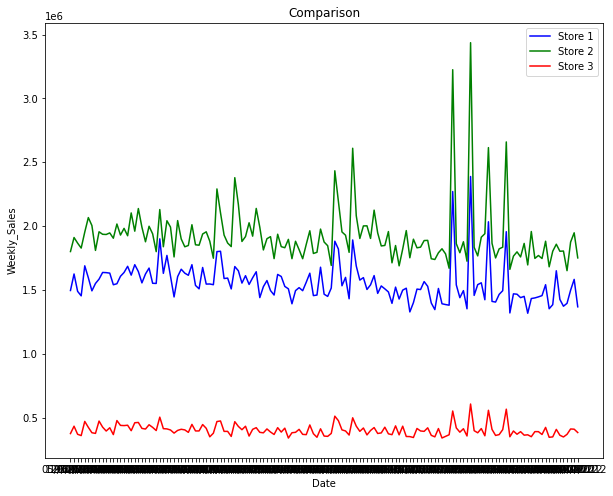

In [ ]:
# Weekly sales comparison across stores
plt.figure(figsize=(10,8))
for store, color in zip([1,2,3], ["b","g","#FF0000"]):
    grouped = sales[sales['Store'] == store].groupby('Date').sum()
    dates = sales[sales['Store'] == store]['Date'].drop_duplicates()
    plt.plot(dates, grouped['Weekly_Sales'], label=f"Store {store}", color=color)

plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Weekly Sales Comparison Across Stores")
plt.legend()
plt.show()

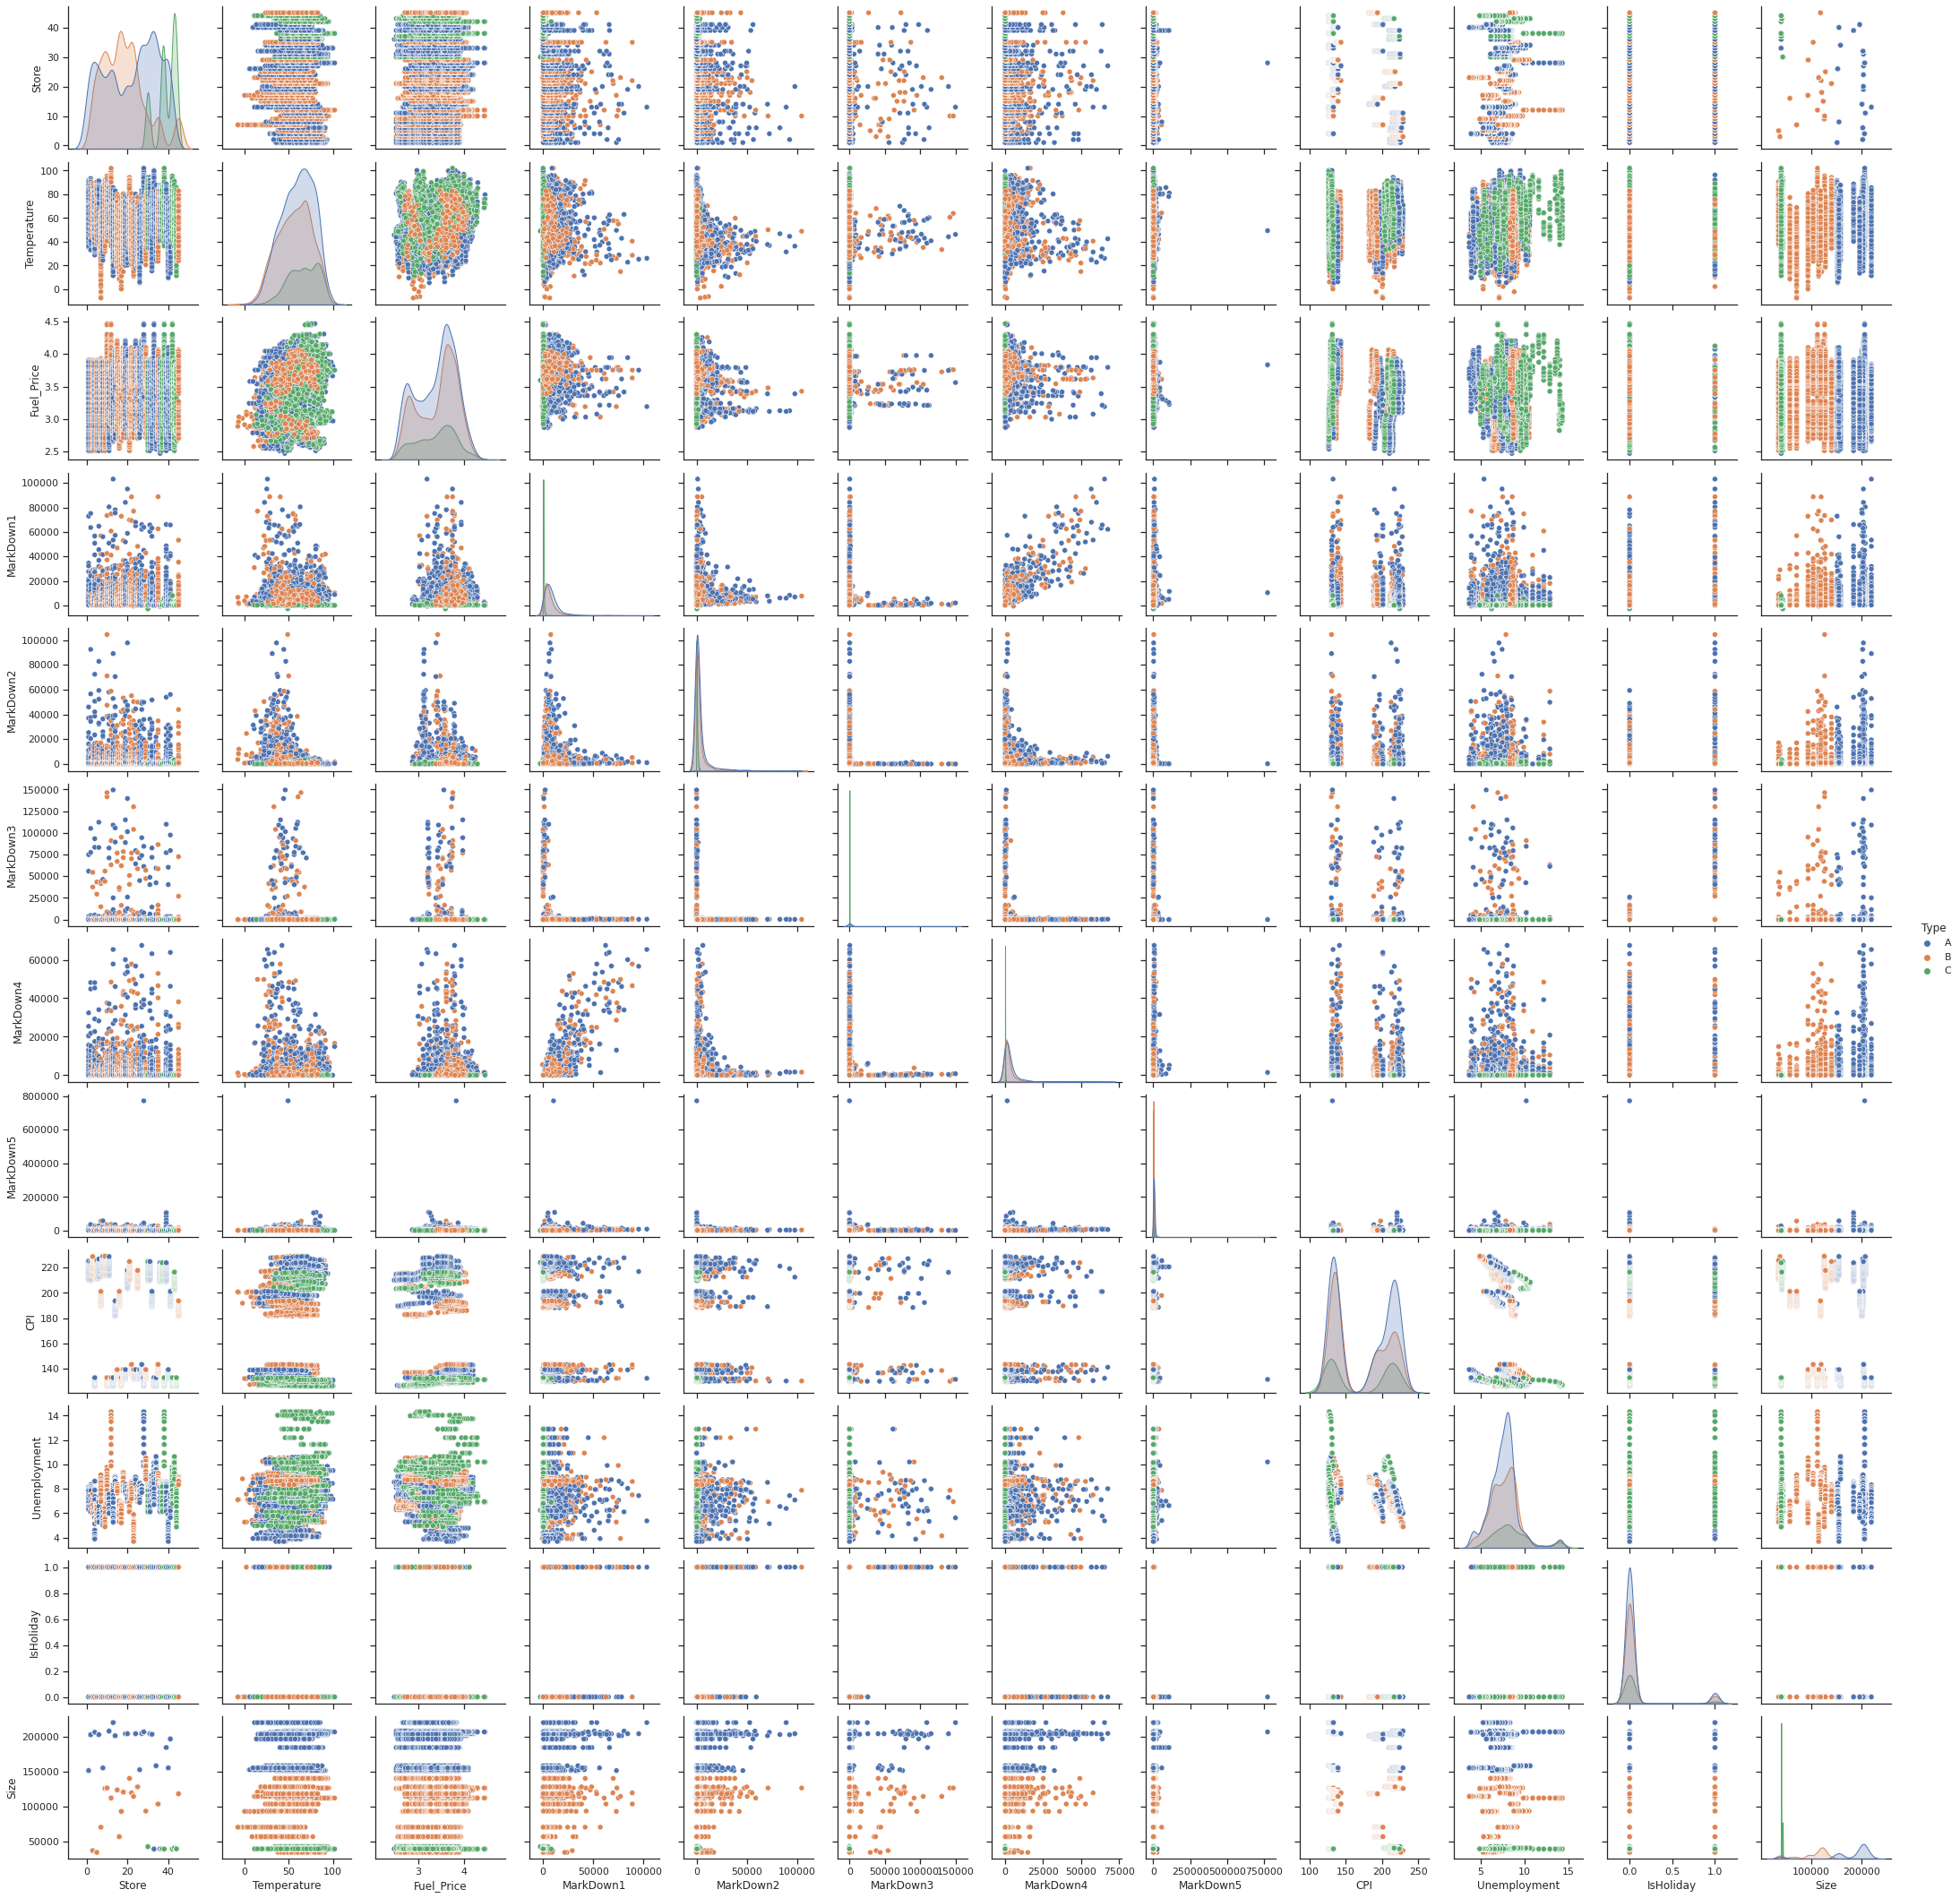

In [ ]:
# Pairplot of features merged with store types
df_full = features.merge(stores, on='Store')
sns.pairplot(df_full, hue="Type")
plt.show()

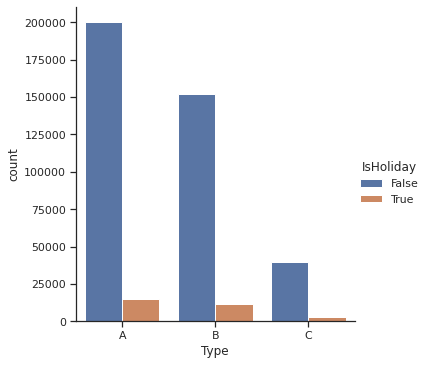

In [ ]:
# Categorical plot: store type vs holiday sales
sns.catplot(x="Type", hue="IsHoliday", kind="count", data=sales.merge(stores, on='Store'))
plt.show()

## 3. Machine Learning Models
We apply KNN for classification and Linear Regression for prediction.

In [ ]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [ ]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [ ]:
salesXstores = sales.merge(stores, on='Store')

In [ ]:
salesXstores

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,B,118221
421566,45,98,05/10/2012,628.10,False,B,118221
421567,45,98,12/10/2012,1061.02,False,B,118221
421568,45,98,19/10/2012,760.01,False,B,118221


In [ ]:
# --- KNN Classification ---
X = features[['Temperature','Fuel_Price','CPI','Unemployment']]
y = stores['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

accuracy = 0.97


In [ ]:
# Build a DataFrame with predictions for inspection
df_pred = pd.DataFrame(X_test, columns=X.columns)
df_pred['Type'] = y_test.values
df_pred['PredType'] = y_pred

In [ ]:
df_pred

,Weekly_Sales,IsHoliday,Size,Type,PredType
272342,50932.42,False,206302,A,A
176581,3196.12,False,120653,B,B
354212,10125.03,False,39690,C,C
281444,3311.26,False,93638,B,B
124208,6335.65,False,219622,A,A
...,...,...,...,...,...
415987,3910.51,False,118221,B,B
193068,9484.13,False,203742,A,A
346600,29354.03,False,39910,C,C
380513,13613.62,False,155083,A,A


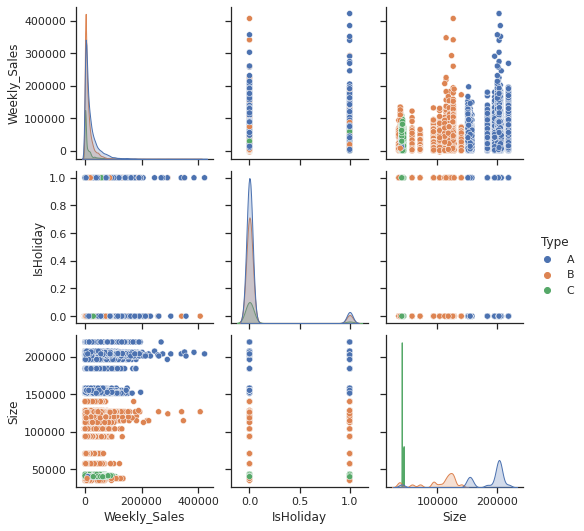

In [ ]:
# Visualize prediction distribution
sns.pairplot(df_pred, hue="Type")
plt.show()

In [ ]:
# Error analysis for class 'A'
df_pred['A_Error'] = df_pred['Type'].apply(lambda a: 1 if a == 'A' else 0)
df_pred['A_Error2'] = df_pred['PredType'].apply(lambda a: 1 if a == 'A' else 0)

# Combine and normalize error flags
df_pred['A_Error'] = (df_pred['A_Error'] + df_pred['A_Error2']) % 2

# Count misclassifications for class 'A'
print("Number of misclassifications for class A:", df_pred['A_Error'].sum())

2628

In [ ]:
# --- Linear Regression ---
X = features[['Temperature','Fuel_Price','CPI','Unemployment']]
y = sales['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))

476172066.4988119

In [ ]:
# Training set error for comparison
train_pred = lr.predict(X_train)
print("Linear Regression MSE (train):", mean_squared_error(y_train, train_pred))

471012370.19617486

## 4. Conclusion
- Store type strongly influences sales distribution.  
- Holidays impact weekly sales averages.  
- Simple ML models (KNN, Linear Regression) demonstrate classification and regression workflows.  

This notebook serves as a **practice archive** for data processing and modeling.